In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h2> 1. Data Collection </h2>

In [2]:
data = pd.read_csv("/Users/dobaophuc/Documents/học data analyst/Python/world_internet_user.csv", encoding="latin1")
data.head()

,Country,Region,Population,Internet Users,% of Population
0,_World,NaN,7920539977,5424080321,68.48
1,Afganistan,Asia,40403518,9237489,22.86
2,Albania,Europe,2872758,2191467,76.28
3,Algeria,Africa,45150879,37836425,83.80
4,American Samoa,Oceania,54995,34800,63.28


<h2> 2. Data Preprocessing </h2>

In [3]:
data.dtypes

Country             object
Region              object
Population           int64
Internet Users       int64
% of Population    float64
dtype: object

<p><strong>All Good!</strong></p>

In [4]:
data.info

<bound method DataFrame.info of              Country       Region  Population  Internet Users  % of Population
0             _World          NaN  7920539977      5424080321            68.48
1         Afganistan         Asia    40403518         9237489            22.86
2            Albania       Europe     2872758         2191467            76.28
3            Algeria       Africa    45150879        37836425            83.80
4     American Samoa      Oceania       54995           34800            63.28
..               ...          ...         ...             ...              ...
238  Wallis & Futuna      Oceania       10932            6200            56.71
239   Western Sahara       Africa      611875           28000             4.58
240            Yemen  Middle East    30938435         8353377            27.00
241           Zambia       Africa    18920651         9870427            52.17
242         Zimbabwe       Africa    15092171         8400000            55.66

[243 rows x 5 colum

<h3> Handling duplicated and missing data </h3>

In [5]:
data.duplicated().any() #check if any data is duplicated

False

In [6]:
data.isnull().sum() #check if any cell is null.

Country            0
Region             1
Population         0
Internet Users     0
% of Population    0
dtype: int64

In [7]:
data.dropna(subset = ['Region'], axis = 0, inplace= True)
data.head()

,Country,Region,Population,Internet Users,% of Population
1,Afganistan,Asia,40403518,9237489,22.86
2,Albania,Europe,2872758,2191467,76.28
3,Algeria,Africa,45150879,37836425,83.80
4,American Samoa,Oceania,54995,34800,63.28
5,Andorra,Europe,77465,73101,94.37


<p> + There is only one missing value in the Region column, which is of the "World" entry.<br>
    + I would delete the row for further analysis.</p>

<h3>Binning</h3>

In [8]:
data.rename(columns ={'Internet Users':'Internet_Users', '% of Population':'IU_Percentage'}, inplace = True)
data.head()

,Country,Region,Population,Internet_Users,IU_Percentage
1,Afganistan,Asia,40403518,9237489,22.86
2,Albania,Europe,2872758,2191467,76.28
3,Algeria,Africa,45150879,37836425,83.80
4,American Samoa,Oceania,54995,34800,63.28
5,Andorra,Europe,77465,73101,94.37


In [9]:
import numpy as np

In [10]:
bins = np.linspace(min(data['IU_Percentage']), max(data['IU_Percentage']),4)
IUP_group = ['low','medium','high']
bins

array([8.00000000e-02, 4.02866667e+01, 8.04933333e+01, 1.20700000e+02])

In [11]:
data['IUP_classification'] = pd.cut(data['IU_Percentage'], bins, labels = IUP_group, include_lowest=True)
data.head()

,Country,Region,Population,Internet_Users,IU_Percentage,IUP_classification
1,Afganistan,Asia,40403518,9237489,22.86,low
2,Albania,Europe,2872758,2191467,76.28,medium
3,Algeria,Africa,45150879,37836425,83.80,high
4,American Samoa,Oceania,54995,34800,63.28,medium
5,Andorra,Europe,77465,73101,94.37,high


<p>*** By "low","medium", and "high", I just mean to equally divide Internet User Percentage into 3 ranges, from its min to its max value (~0.08 -> 40.29 -> 80.49 -> 120.7).</p>

<h2>3. Exploratory Data Analysis </h2>

<h3>Descriptive Statistics</h3>

In [12]:
data.describe()

,Population,Internet_Users,IU_Percentage
count,2.420000e+02,2.420000e+02,242.000000
mean,3.272950e+07,2.241356e+07,69.927066
std,1.348221e+08,8.995328e+07,27.483660
min,5.960000e+02,4.140000e+02,0.080000
25%,3.257340e+05,1.930792e+05,52.180000
50%,5.279970e+06,2.846423e+06,77.970000
75%,1.958173e+07,9.840202e+06,91.020000
max,1.448314e+09,1.010740e+09,120.700000


<h3> Boxplots of Internet User Distribution by Regions </h3>

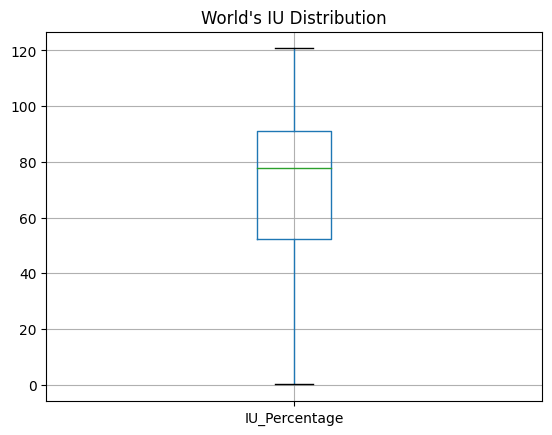

In [13]:
b1 = ['IU_Percentage']

boxplot = data.boxplot(b1)  
plt.xticks(rotation=0)
plt.title("World's IU Distribution")
plt.show()

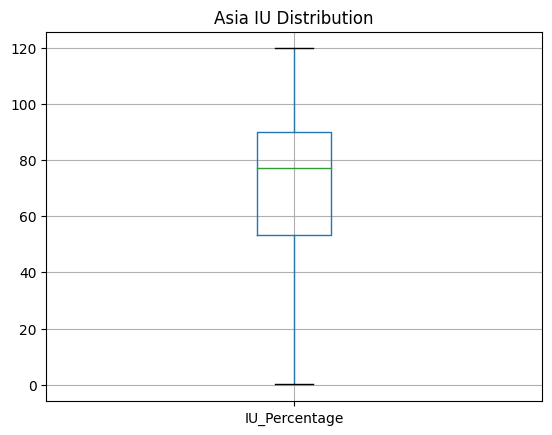

In [14]:
boxplot = data[data['Region'] == 'Asia'].boxplot(b1)  
plt.xticks(rotation=0)
plt.title("Asia IU Distribution")
plt.show()

<p> * The IU percentage in Asia nearly resembles that of the world's figure</p>

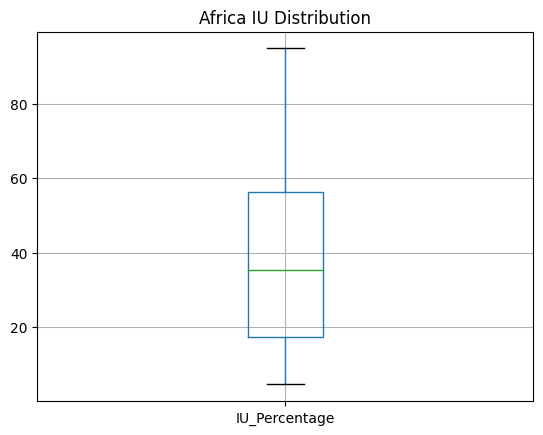

In [15]:
boxplot = data[data['Region'] == 'Africa'].boxplot(b1)  
plt.xticks(rotation=0)
plt.title("Africa IU Distribution")
plt.show()

<p> * The IU percentage in Africa is still far below the world's level, with <strong>more than 75%</strong> countries having less than <strong>60%</strong> of population using the Internet</p>

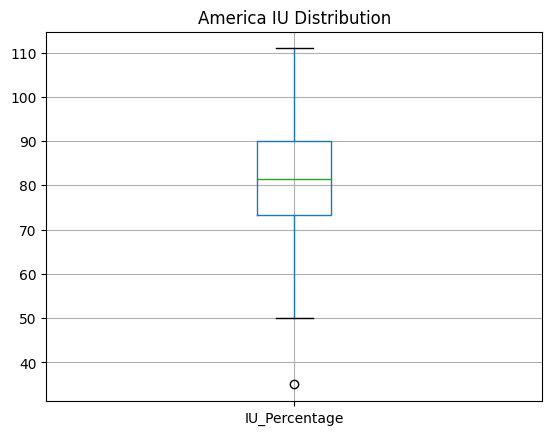

In [16]:
boxplot = data[data['Region'] == 'America'].boxplot(b1)  
plt.xticks(rotation=0)
plt.title("America IU Distribution")
plt.show()

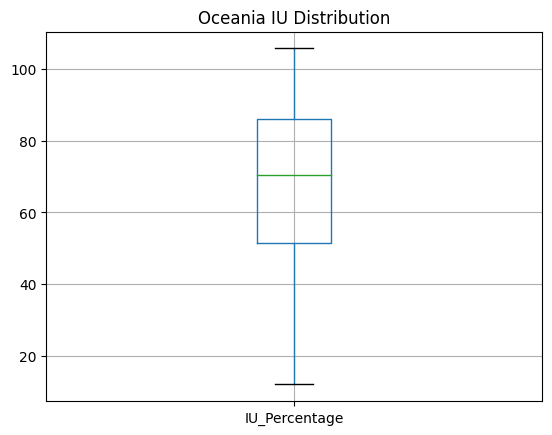

In [17]:
boxplot = data[data['Region'] == 'Oceania'].boxplot(b1)  
plt.xticks(rotation=0)
plt.title("Oceania IU Distribution")
plt.show()

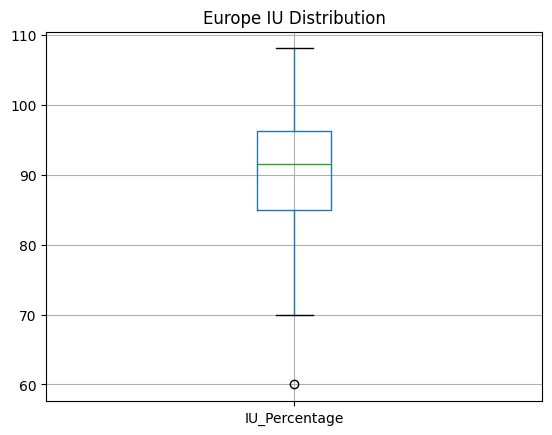

In [18]:
boxplot = data[data['Region'] == 'Europe'].boxplot(b1)  
plt.xticks(rotation=0)
plt.title("Europe IU Distribution")
plt.show()

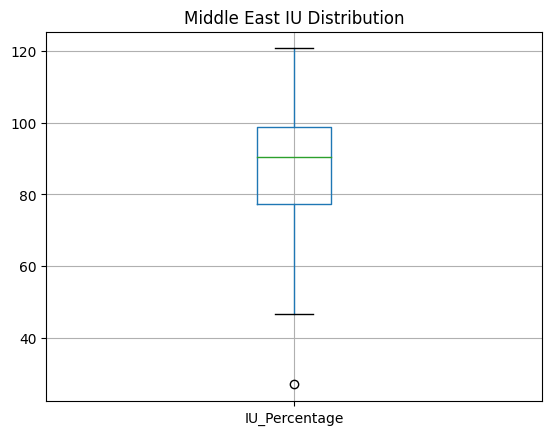

In [19]:
boxplot = data[data['Region'] == 'Middle East'].boxplot(b1)  
plt.xticks(rotation=0)
plt.title("Middle East IU Distribution")
plt.show()

In [20]:
import seaborn as sns

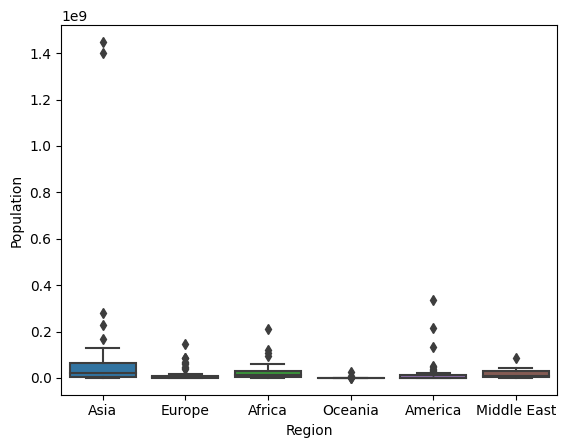

In [21]:
sns.boxplot(x= 'Region', y= 'Population', data=data)
plt.show()

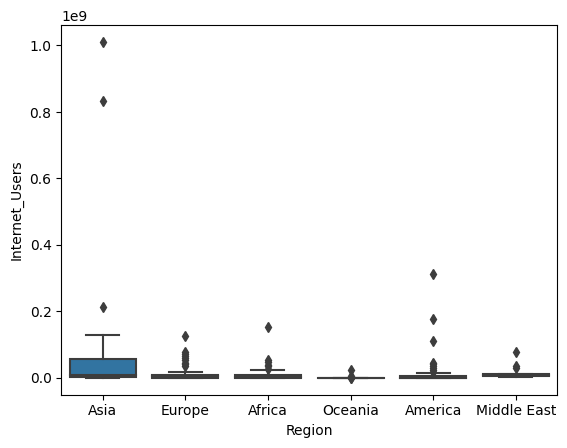

In [22]:
sns.boxplot(x= 'Region', y= 'Internet_Users', data=data)
plt.show()

<p> We can spot out 2 outliers in Asia, but I will temporarily leave them in the data because I still don't know what to do with them and why I have to do =)))</p>

<h3> The distribution of country by Region </h3>

In [23]:
data['Region'].value_counts()

Africa         58
America        55
Europe         53
Asia           35
Oceania        27
Middle East    14
Name: Region, dtype: int64

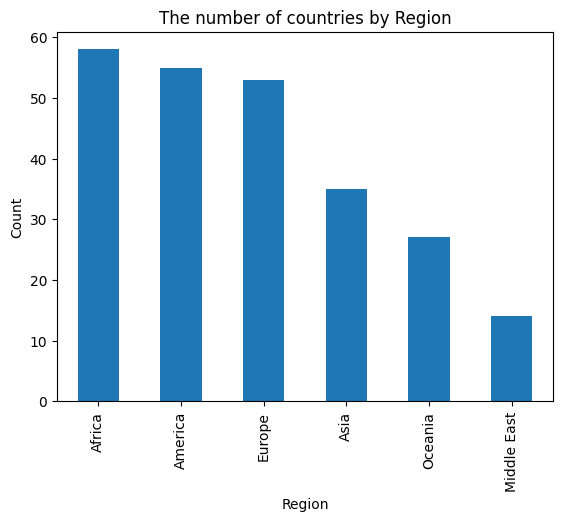

In [24]:
data['Region'].value_counts().plot(kind="bar")
plt.title('The number of countries by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

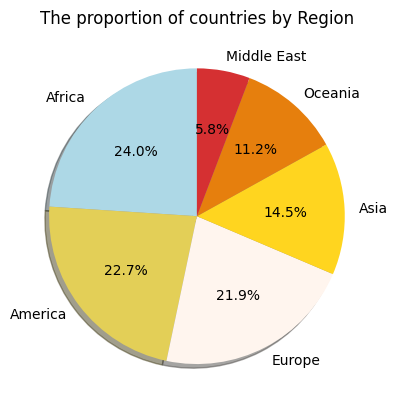

In [25]:
Region = ('Africa','America','Europe','Asia','Oceania','Middle East')
counts = (58,55,53,35,27,14)
colors = ('#ADD8E6','#E3CF57','#FFF5EE', '#FFD51F', '#E67F0D', '#D53032')
plt.pie(
counts,
startangle = 90,
labels = Region,
colors= colors,
autopct = '%1.1f%%',
shadow = True)
plt.title('The proportion of countries by Region')
plt.show()

<h2>4. Some of my random curious analysis questions </h2>

<h3>How many countries that are providing the Internet for most of their citizens, and how many countries poorly deliver it?</h3>

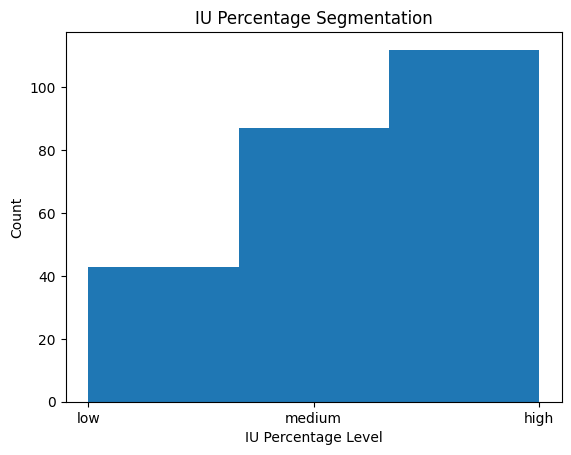

In [26]:
plt.hist(data['IUP_classification'], bins = 3)

# set x/y labels and plot title
plt.xlabel("IU Percentage Level")
plt.ylabel("Count")
plt.title("IU Percentage Segmentation")
plt.show()

<h3>Do the High IUP countries scatter around the world or cluster at a certain Region?</h3>

In [27]:
#Count the number of High IUP countries by Region
high = data[data['IUP_classification']=='high']
high['Region'].value_counts()

Europe         44
America        30
Asia           16
Middle East    10
Oceania         9
Africa          3
Name: Region, dtype: int64

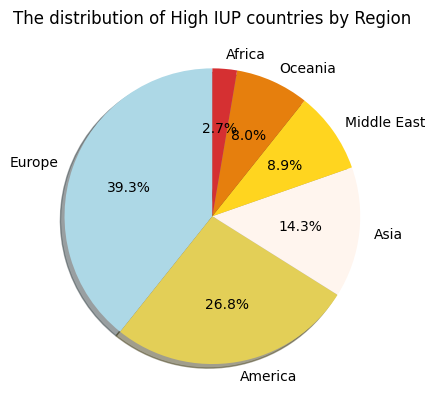

In [28]:
Region = ('Europe','America','Asia','Middle East','Oceania','Africa')
counts = (44,30,16,10,9,3)
colors = ('#ADD8E6','#E3CF57','#FFF5EE', '#FFD51F', '#E67F0D', '#D53032')
plt.pie(
counts,
startangle = 90,
labels = Region,
colors= colors,
autopct = '%1.1f%%',
shadow = True)
plt.title('The distribution of High IUP countries by Region')
plt.show()

<p>*NOTE: Europe and America takes up 2/3 of the total number of High UIP countries.</p>

<h3>Similarly, Do the Low IUP countries scatter around the world or cluster at a certain Region?</h3>

In [29]:
low = data[data['IUP_classification']=='low']
low['Region'].value_counts()

Africa         33
Asia            5
Oceania         3
America         1
Middle East     1
Name: Region, dtype: int64

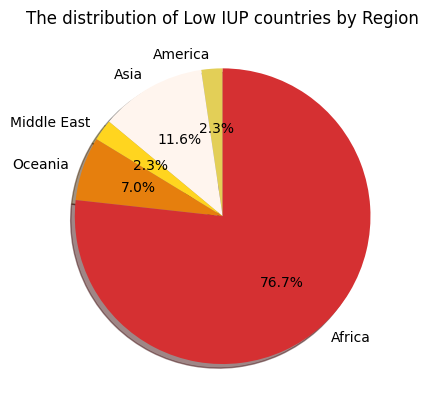

In [30]:
Region = ('America','Asia','Middle East','Oceania','Africa')
counts = (1,5,1,3,33)
colors = ('#E3CF57','#FFF5EE', '#FFD51F', '#E67F0D', '#D53032')
plt.pie(
counts,
startangle = 90,
labels = Region,
colors= colors,
autopct = '%1.1f%%',
shadow = True)
plt.title('The distribution of Low IUP countries by Region')
plt.show()

<p>*NOTE: Europe, America, and Middle East have <strong>no more than 1 country</strong> with Low UIP, while Africa takes up <strong>more than 3/4</strong> of the pie.</p>

<h3>How about the average of IU percentage by regions?</h3>

In [31]:
IURegion = pd.pivot_table(data,values = ['Population','Internet_Users','IU_Percentage'], index='Region', aggfunc= 'mean')
IURegion.sort_values(by = 'IU_Percentage', ascending = True)
IURegion

,IU_Percentage,Internet_Users,Population
Region,,,
Africa,38.097931,1.036845e+07,2.385330e+07
America,80.781455,1.623539e+07,1.882772e+07
Asia,70.911143,8.382533e+07,1.243477e+08
Europe,89.757925,1.416596e+07,1.580102e+07
Middle East,85.135000,1.527783e+07,1.916449e+07
Oceania,68.101481,1.155254e+06,1.614710e+06


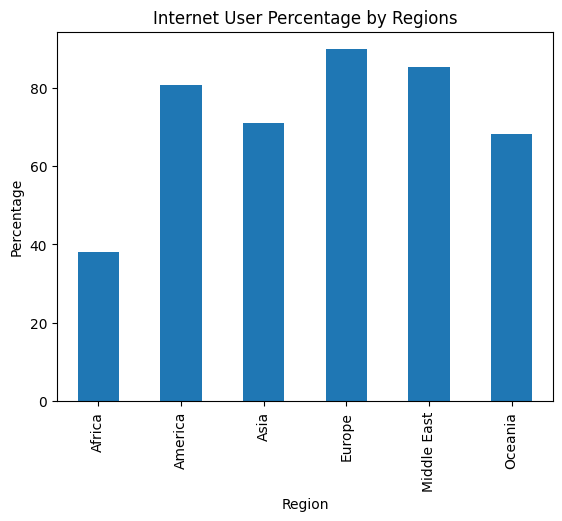

In [32]:
IURegion['IU_Percentage'].plot(kind = 'bar')
plt.title('Internet User Percentage by Regions')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.show()

<h3> What is the country with the least Internet User Percentage? </h3>

In [33]:
maxUI = data.sort_values('IU_Percentage', ascending = True)
maxUI.head()

,Country,Region,Population,Internet_Users,IU_Percentage,IUP_classification
113,"Korea, North",Asia,25961763,20000,0.08,low
239,Western Sahara,Africa,611875,28000,4.58,low
67,Eritrea,Africa,3626986,248199,6.84,low
198,South Sudan,Africa,11381378,900716,7.91,low
128,Madagascar,Africa,28427328,2864000,10.07,low


<p> - North Korea is the only Asian country in top 5 countries with the least Internet User Percentage, along with other 4 African countries. </p>
<p> - More than <strong>99.9 percent</strong> of the country's population remained offline at the start of 2022. </p>
<p> - According to <em>"Digital 2022: North Korea"</em> report from <strong>datareportal.com</strong>, only a few people in the country are able to access international websites, and it seems likely that a sizeable proportion of this small group will be made up of foreign expatriates and the country's political elite </p>

<h3> What is the country with the most Internet User Percentage? </h3>

In [34]:
maxUI.tail()

,Country,Region,Population,Internet_Users,IU_Percentage,IUP_classification
57,Cyprus,Europe,1221767,1320400,108.07,high
40,Cayman Islands,America,66990,73800,110.17,high
175,Puerto Rico,America,2747603,3047311,110.91,high
32,Brunei Darussulam,Asia,444336,531800,119.68,high
228,United Arab Emirates,Middle East,10088517,12176400,120.70,high


<h3>Thank you for watching!</h3>